In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

<pre>
survived : 생존=1, 죽음=0
pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
sibsp : 함께 탑승한 형제 또는 배우자 수
parch : 함께 탑승한 부모 또는 자녀 수
ticket : 티켓 번호
cabin : 선실 번호
embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
<pre\>

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

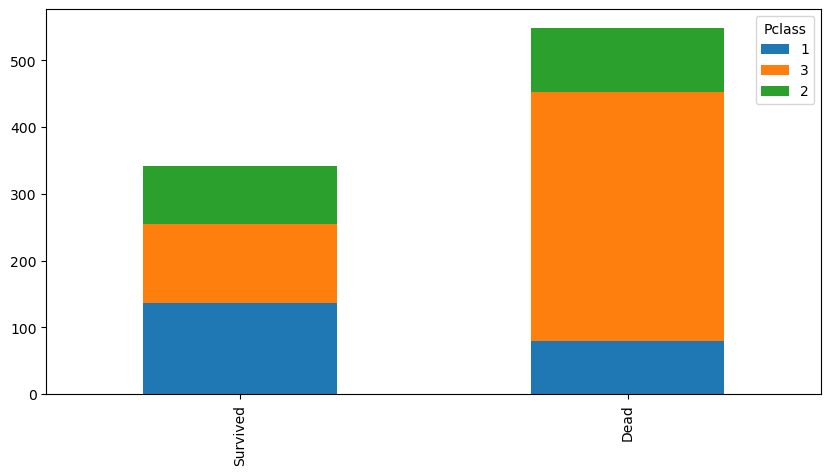

In [10]:
bar_chart("Pclass")

In [11]:
train_df=train_df.drop(['PassengerId','Name','Ticket'],axis=1)
test_df=test_df.drop(['Name','Ticket'],axis=1)

In [12]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


pd.get_dummies() : 수치형 데이터를 범주형 데이터로 바꿔주는 펑션

In [14]:
pclass_train_dummies = pd.get_dummies(train_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

pclass_train_dummies.columns = ['first', 'second', 'third']
pclass_test_dummies.columns = ['first', 'second', 'third']

train_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

train_df = train_df.join(pclass_train_dummies)
test_df = test_df.join(pclass_test_dummies)

In [19]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,first,second,third
0,0,male,22.0,1,0,7.2500,NaN,S,False,False,True
1,1,female,38.0,1,0,71.2833,C85,C,True,False,False
2,1,female,26.0,0,0,7.9250,NaN,S,False,False,True
3,1,female,35.0,1,0,53.1000,C123,S,True,False,False
4,0,male,35.0,0,0,8.0500,NaN,S,False,False,True


In [18]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [22]:
train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

In [24]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
train_df['Embarked'].fillna('S',inplace=True)
test_df['Embarked'].fillna('S',inplace=True)

In [26]:
embarked_train_dummies = pd.get_dummies(train_df['Embarked'])
embarked_test_dummies = pd.get_dummies(test_df['Embarked'])

embarked_train_dummies.columns = ['C', 'Q', 'S']
embarked_test_dummies.columns = ['C', 'Q', 'S']

train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

train_df = train_df.join(embarked_train_dummies)
test_df = test_df.join(embarked_test_dummies)

In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   first        418 non-null    bool   
 7   second       418 non-null    bool   
 8   third        418 non-null    bool   
 9   C            418 non-null    bool   
 10  Q            418 non-null    bool   
 11  S            418 non-null    bool   
dtypes: bool(6), float64(2), int64(3), object(1)
memory usage: 22.2+ KB


In [30]:
test_df['Fare'].fillna(0,inplace=True)

In [32]:
sex_train_dummies = pd.get_dummies(train_df['Sex'])
sex_test_dummies = pd.get_dummies(test_df['Sex'])

sex_train_dummies.columns = ['Female','Male']
sex_test_dummies.columns = ['Female','Male']

train_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

train_df = train_df.join(sex_train_dummies)
test_df = test_df.join(sex_test_dummies)

In [33]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,first,second,third,C,Q,S,Female,Male
0,0,22.0,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,False,True,False
2,1,26.0,0,0,7.9250,False,False,True,False,False,True,True,False
3,1,35.0,1,0,53.1000,True,False,False,False,False,True,True,False
4,0,35.0,0,0,8.0500,False,False,True,False,False,True,False,True


In [34]:
X_train=train_df.drop('Survived',axis=1).copy()
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId',axis=1).copy()

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=30000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.8047138047138047

In [38]:
print(Y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X_train, Y_train)

0.9820426487093153

In [40]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [47]:
X_train.values

array([[22.0, 1, 0, ..., True, False, True],
       [38.0, 1, 0, ..., False, True, False],
       [26.0, 0, 0, ..., True, True, False],
       ...,
       [29.69911764705882, 1, 2, ..., True, True, False],
       [26.0, 0, 0, ..., False, False, True],
       [32.0, 0, 0, ..., False, False, True]], dtype=object)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
 4   first   891 non-null    bool   
 5   second  891 non-null    bool   
 6   third   891 non-null    bool   
 7   C       891 non-null    bool   
 8   Q       891 non-null    bool   
 9   S       891 non-null    bool   
 10  Female  891 non-null    bool   
 11  Male    891 non-null    bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 34.9 KB


In [55]:
X_train = X_train.astype(float)

data.shape torch.Size([891, 12])
Epoch [0/20000], Loss: 1.4296
Epoch [100/20000], Loss: 0.6056
Epoch [200/20000], Loss: 0.6018
Epoch [300/20000], Loss: 0.5983
Epoch [400/20000], Loss: 0.5949
Epoch [500/20000], Loss: 0.5916
Epoch [600/20000], Loss: 0.5884
Epoch [700/20000], Loss: 0.5854
Epoch [800/20000], Loss: 0.5824
Epoch [900/20000], Loss: 0.5796
Epoch [1000/20000], Loss: 0.5769
Epoch [1100/20000], Loss: 0.5742
Epoch [1200/20000], Loss: 0.5717
Epoch [1300/20000], Loss: 0.5693
Epoch [1400/20000], Loss: 0.5669
Epoch [1500/20000], Loss: 0.5646
Epoch [1600/20000], Loss: 0.5624
Epoch [1700/20000], Loss: 0.5603
Epoch [1800/20000], Loss: 0.5582
Epoch [1900/20000], Loss: 0.5562
Epoch [2000/20000], Loss: 0.5542
Epoch [2100/20000], Loss: 0.5523
Epoch [2200/20000], Loss: 0.5505
Epoch [2300/20000], Loss: 0.5487
Epoch [2400/20000], Loss: 0.5470
Epoch [2500/20000], Loss: 0.5453
Epoch [2600/20000], Loss: 0.5436
Epoch [2700/20000], Loss: 0.5420
Epoch [2800/20000], Loss: 0.5405
Epoch [2900/20000], Lo

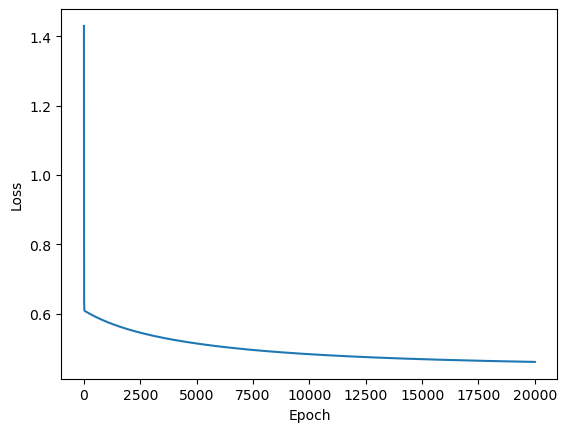

In [61]:
import torch
import torch.nn as nn

# Convert data and labels to PyTorch Variables
data=torch.tensor(X_train.values, dtype=torch.float)
labels=torch.tensor(Y_train.values, dtype=torch.float)
labels = labels.view(-1, 1) ## reshape와 같은 함수
num_samples, num_features = data.shape

# print("data_1.shape",data_1.shape)
# print("data_2.shape",data_2.shape)
print("data.shape",data.shape)

# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(num_features, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

# Initialize model, loss function, and optimizer
learning_rate = 0.001
num_epochs = 20000
input_dim = num_features
output_dim = 1
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train model
loss_history = []
for epoch in range(num_epochs+1):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.data.numpy())

    if epoch % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch, num_epochs, loss.data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

data.shape torch.Size([891, 12])
Epoch [0/20000], Loss: 1.7743
Epoch [100/20000], Loss: 1.4066
Epoch [200/20000], Loss: 1.1296
Epoch [300/20000], Loss: 0.9266
Epoch [400/20000], Loss: 0.7746
Epoch [500/20000], Loss: 0.6710
Epoch [600/20000], Loss: 0.6137
Epoch [700/20000], Loss: 0.5899
Epoch [800/20000], Loss: 0.5813
Epoch [900/20000], Loss: 0.5763
Epoch [1000/20000], Loss: 0.5716
Epoch [1100/20000], Loss: 0.5669
Epoch [1200/20000], Loss: 0.5620
Epoch [1300/20000], Loss: 0.5572
Epoch [1400/20000], Loss: 0.5522
Epoch [1500/20000], Loss: 0.5468
Epoch [1600/20000], Loss: 0.5415
Epoch [1700/20000], Loss: 0.5360
Epoch [1800/20000], Loss: 0.5304
Epoch [1900/20000], Loss: 0.5213
Epoch [2000/20000], Loss: 0.5141
Epoch [2100/20000], Loss: 0.5076
Epoch [2200/20000], Loss: 0.5015
Epoch [2300/20000], Loss: 0.4956
Epoch [2400/20000], Loss: 0.4902
Epoch [2500/20000], Loss: 0.4852
Epoch [2600/20000], Loss: 0.4803
Epoch [2700/20000], Loss: 0.4757
Epoch [2800/20000], Loss: 0.4713
Epoch [2900/20000], Lo

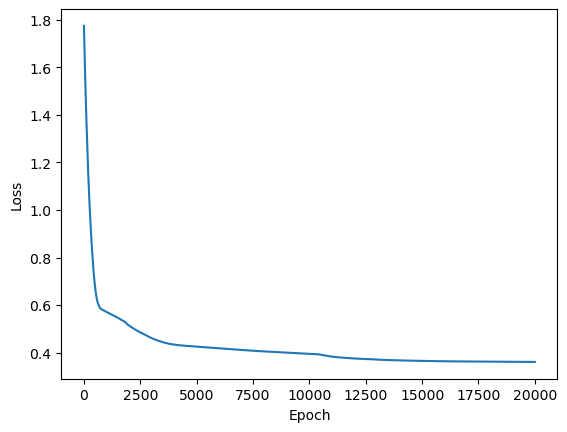

In [161]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Convert data and labels to PyTorch Variables
data=torch.tensor(X_train.values, dtype=torch.float)
labels=torch.tensor(Y_train.values, dtype=torch.float)
labels = labels.view(-1, 1) ## reshape와 같은 함수
num_samples, num_features = data.shape

# print("data_1.shape",data_1.shape)
# print("data_2.shape",data_2.shape)
print("data.shape",data.shape)

# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        #self.dropout = nn.Dropout(0.01)
        self.linear1 = nn.Linear(num_features, 6)
        self.linear2 = nn.Linear(6, 3)
        self.linear3 = nn.Linear(3, output_dim)

    def forward(self, x):
        x = self.linear1(F.relu(x))
        x = self.linear2(F.relu(x))
        x = self.linear3(x)
        x = torch.sigmoid(x)
        return x

# Initialize model, loss function, and optimizer
learning_rate = 0.00015
num_epochs = 20000
input_dim = num_features
output_dim = 1
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)

# Train model
loss_history = []
for epoch in range(num_epochs+1):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.data.numpy())

    if epoch % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch, num_epochs, loss.data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [162]:
model.eval()
x_test = torch.tensor(X_test.values.astype(float), dtype=torch.float32)
y_test = model(x_test)
y_test=torch.round(y_test.squeeze().detach()).int()
print(f"예측 값: {torch.round(y_test.squeeze().detach())}")

예측 값: tensor([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1,

In [163]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_test})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
